     0    1    2    3    4    5    6    7    8
0  0.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0
1  4.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  2.0  3.0  0.0  0.0  0.0  0.0  4.0  3.0  0.0
6  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0
8  0.0  0.0  3.0  4.0  0.0  0.0  0.0  0.0  0.0
     0    1    2    3    4    5    6    7    8
0 -1.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0
1  4.0 -1.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0
2  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  3.0
3  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  4.0
4  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0
5  2.0  3.0  0.0  0.0  0.0 -1.0  4.0  3.0  0.0
6  0.0  0.0  0.0  0.0  0.0  4.0 -1.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  3.0  0.0 -1.0  0.0
8  0.0  0.0  3.0  4.0  0.0  0.0  0.0  0.0 -1.0
DELETED:  0 1
4.0
     0    1    2    3    4    5    6    7 

D:\Users\oleji\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


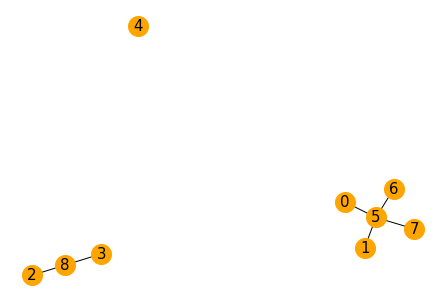

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx


n,k=9,2


d = pd.DataFrame(np.zeros((n, n)))
a = pd.DataFrame(np.zeros((n, n)))

for i in range(0,n):
    for j in range(i+1,n):
        d[i][j]=np.random.randint(2,10)

for i in range(0,n):
    for j in range(0,n):
        if(d[i][j]!=0):
            d[j][i]=d[i][j]


for i in range(0,n):
    minimal=d[0][1]
    i_min,j_min=0,1
    for j in range(0,n):
        if(d[i][j]<=minimal and i!=j):
            minimal=d[i][j]
            i_min,j_min=i,j
    a[i_min][j_min]=a[j_min][i_min]=d[i_min][j_min]
  
print(a)

for i in range(0,n):
    minim=None
    i_min,j_min=0,1
    if (a[i][i]!=-1):
        for j in range(0,n):
            if (a[i][j]==0 and i!=j):
                if(minim==None or minim>a[i][j]):
                    minim=a[i][j]
                    i_min,j_min=i,i
        a[i_min][j_min]=a[j_min][i_min]=d[i_min][j_min]
        a[i][i]=a[j][j]=-1

print(a)

for i in range(0,k-1):
    max=0
    i_max,j_max=0,0
    for j in range(0,n):
        for l in range(0,n):
            if(a[j][l]>max and j!=l):
                max=a[j][l]
                i_max,j_max=j,l
    print('DELETED: ', i_max,j_max)
    print(max)
    a[i_max][j_max]=a[j_max][i_max]=0
    
print(a)


links = a.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[(links['value'] == -1.0) | (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
